<a href="https://colab.research.google.com/github/A380586/Cars_v_Jets_/blob/main/Cars_vs_jets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries


In [132]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from PIL import Image

# import dataset

In [133]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [134]:
img_height = 180
img_width = 180
batch_size = 100

In [135]:
ds_train = tf.keras.utils.image_dataset_from_directory(
  'gdrive/MyDrive/Advanced coding/Datasets',
  validation_split=0.2,
  subset="training",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 95 files belonging to 2 classes.
Using 76 files for training.


In [136]:
ds_validation = tf.keras.utils.image_dataset_from_directory(
  'gdrive/MyDrive/Advanced coding/Datasets',
  validation_split=0.2,
  subset="validation",
  shuffle=True,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 95 files belonging to 2 classes.
Using 19 files for validation.


In [137]:
os.listdir('gdrive/MyDrive/Advanced coding/Datasets')

['Jet', 'Car']

# Display dataset

In [138]:
class_names = ds_train.class_names
print(class_names)

['Car', 'Jet']


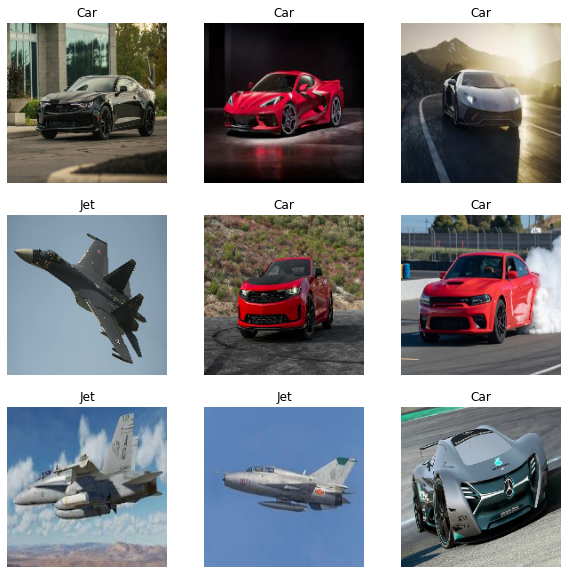

In [139]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Preprocessing

# Model code

In [140]:
def create_cnn_model():
  model = tf.keras.Sequential([
                tf.keras.layers.Conv2D(16, (2,2), activation='relu', input_shape=(img_height, img_width, 3)),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
                tf.keras.layers.MaxPool2D(2, 2),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.Dense(2, activation='softmax')
])
  model.compile(loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'],
                      optimizer='adam'
                      )
  return model

In [141]:
model = create_cnn_model()
ES = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights='True'
)

In [142]:
model.fit(ds_train,
          epochs=15,
          validation_data=ds_validation,
          callbacks=[ES])

Epoch 1/15
1/1 [==============================] - 4s 4s/step - loss: 5.2371 - accuracy: 0.4868 - val_loss: 245.1757 - val_accuracy: 0.7895
Epoch 2/15
1/1 [==============================] - 3s 3s/step - loss: 598.0225 - accuracy: 0.4474 - val_loss: 0.9776 - val_accuracy: 0.8947
Epoch 3/15
1/1 [==============================] - 3s 3s/step - loss: 2.5911 - accuracy: 0.9079 - val_loss: 367.8734 - val_accuracy: 0.2105
Epoch 4/15
1/1 [==============================] - 3s 3s/step - loss: 188.9026 - accuracy: 0.5526 - val_loss: 271.8310 - val_accuracy: 0.2105
Epoch 5/15
1/1 [==============================] - 3s 3s/step - loss: 140.0013 - accuracy: 0.5526 - val_loss: 156.1106 - val_accuracy: 0.2105
Epoch 5: early stopping


In [143]:
def inference_function(image_path):
  """
  image_path (str): path of the image file

  returns index, probability
  img (PIL.Image.Image): the image from the image_path
  index (int): the class the image belongs to
  probability (float): the probability for that class
  """

  img = tf.keras.utils.load_img(
      image_path, target_size=(img_height, img_width)
  )

  img_array = tf.keras.utils.img_to_array(
    img, data_format=None, dtype=None
  )
  img_array = img_array*(1./255)
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)

  pred = np.squeeze(predictions)
  index = np.argmax(pred)

  probability = pred[1]

  return img, index, probability

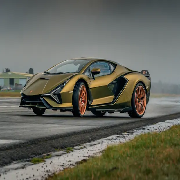

Car 0.4844094


In [144]:
img, class_index, class_probability = inference_function("3281 (1).webp")

class_name = class_names[class_index]
display(img)
print(class_name, class_probability)

## Inference function